In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [47]:
df = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


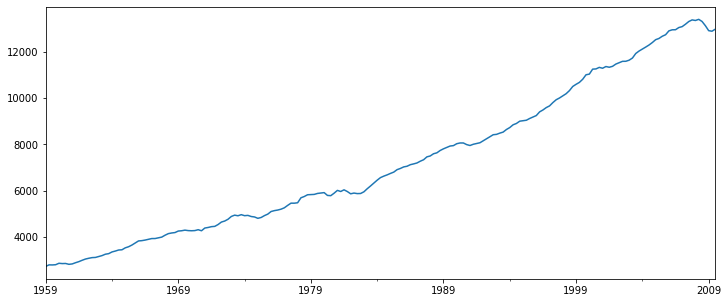

In [5]:
df['realgdp'].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [11]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [12]:
df['trend'] = gdp_trend

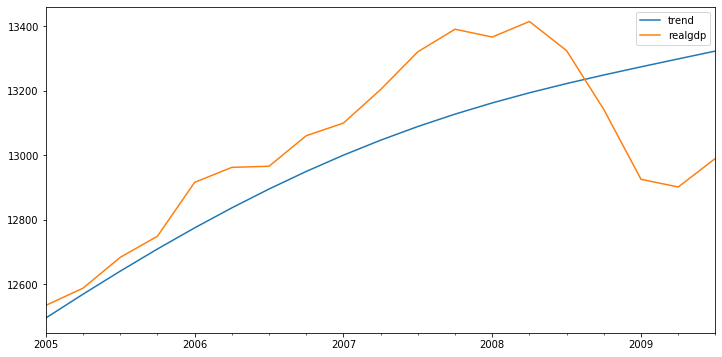

In [15]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,6))

In [40]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [41]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [42]:
airline = airline.dropna()

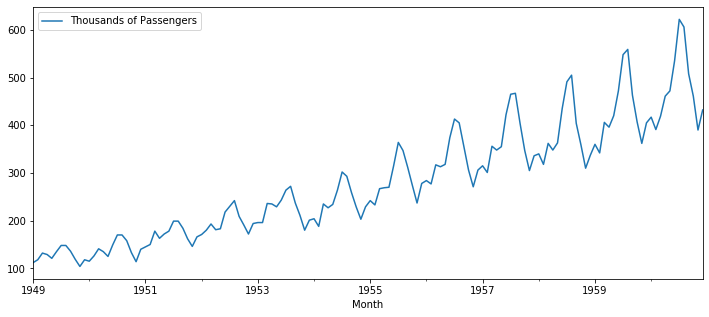

In [43]:
airline.plot()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

In [22]:
result

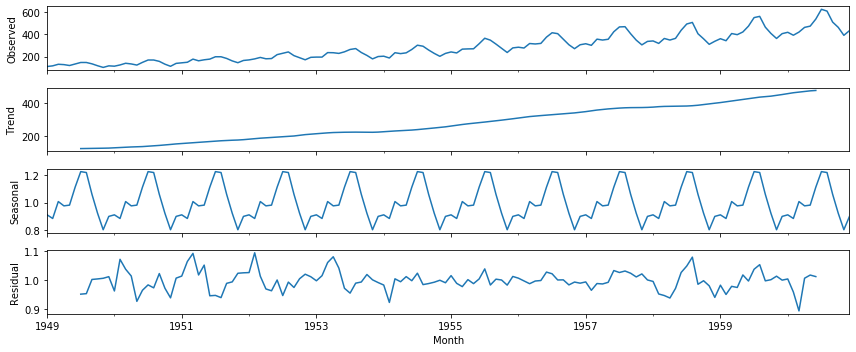

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

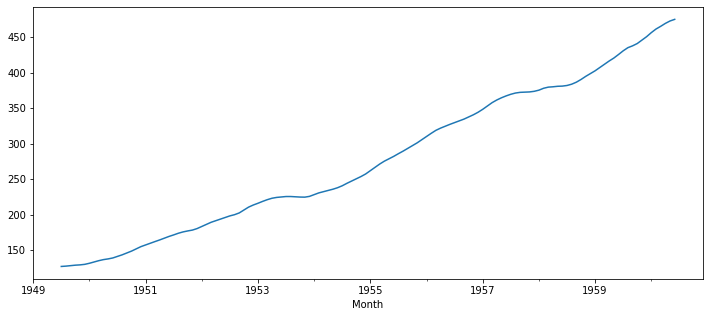

In [26]:
result.trend.plot()

In [37]:
airline['EDMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

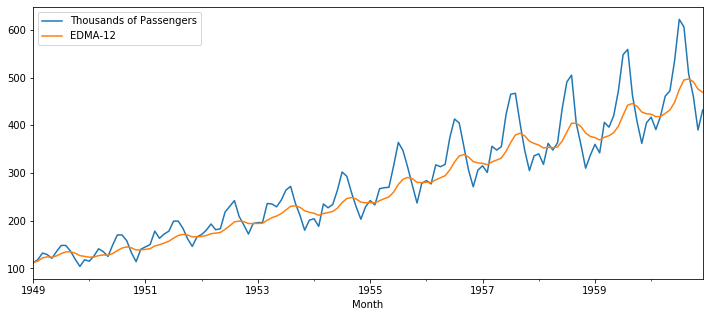

In [38]:
airline[['Thousands of Passengers','EDMA-12' ]].plot()

In [44]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [48]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [49]:
airline.index.freq = 'MS'

In [50]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [52]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [53]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [54]:
span = 12
alpha = 2/(span+1)

In [55]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [70]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [57]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [59]:
fitter_model = model.fit(smoothing_level=alpha,optimized=False)

In [62]:
airline['SES12'] = fitter_model.fittedvalues.shift(-1)

In [69]:
airline.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [83]:
airline['DESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'].astype('double'), trend='mul').fit().fittedvalues.shift(-1)

In [84]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336672,112.049247
1949-02-01,118,112.923077,112.923077,120.336672,118.051885
1949-03-01,132,115.857988,115.857988,134.336672,132.058041
1949-04-01,129,117.879836,117.879836,131.336672,129.056722
1949-05-01,121,118.359861,118.359861,123.336672,121.053204


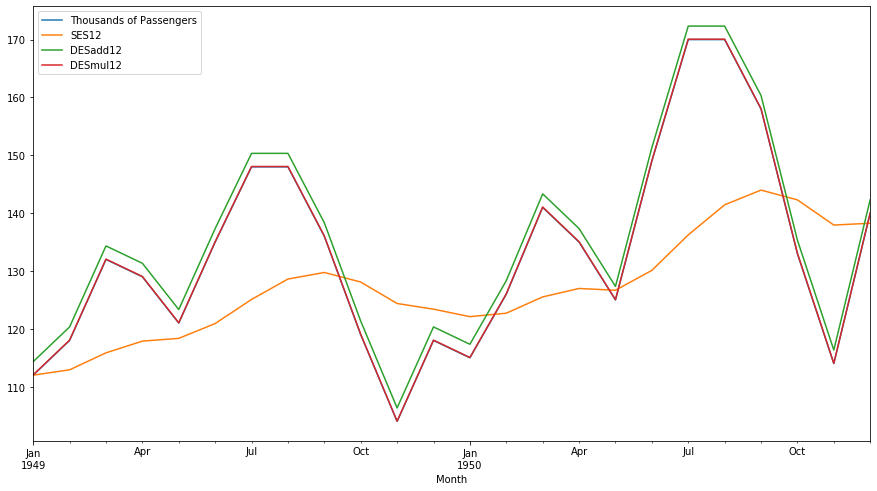

In [85]:
airline.drop('EWMA12',axis=1).iloc[:24].plot(figsize=(15,8))

In [88]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'].astype('double'),trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [89]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336672,112.049247,111.620925
1949-02-01,118,112.923077,112.923077,120.336672,118.051885,118.857726
1949-03-01,132,115.857988,115.857988,134.336672,132.058041,133.348021
1949-04-01,129,117.879836,117.879836,131.336672,129.056722,127.907733
1949-05-01,121,118.359861,118.359861,123.336672,121.053204,120.987070


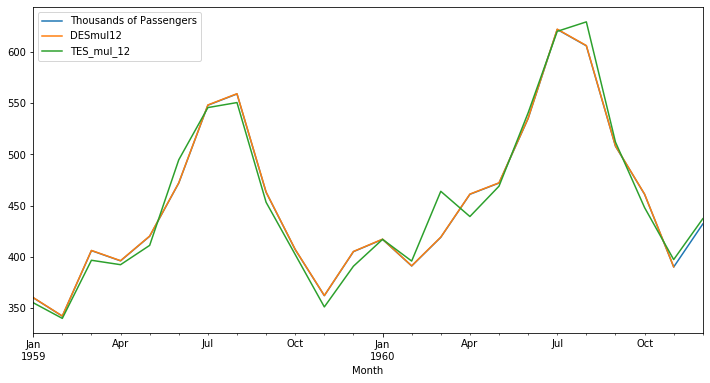

In [92]:
airline[['Thousands of Passengers','DESmul12','TES_mul_12']].iloc[-24:].plot(figsize=(12,6))